In [25]:
import wandb
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
# sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [26]:
def get_runs_df(project, entity="jurujin"):
    '''
    Returns df with data from wandb project for stable-sig
    '''
    api = wandb.Api()
    runs = api.runs(entity + "/" + project)

    summary_list, config_list, name_list = [], [], []
    for run in runs:
        summary_list.append(run.summary._json_dict)
        config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})
        name_list.append(run.name)


    summary_df = pd.DataFrame(summary_list)
    config_df = pd.DataFrame(config_list)

    df = pd.concat([summary_df.reset_index(drop=True), config_df.reset_index(drop=True)], axis=1)
    df["name"] = name_list

    return df

In [27]:
markersize=6
ticks_font = 20
label_font = 26
legend_font = 22

In [28]:
df_msg = get_runs_df("diff_attacks_metr")

df_msg = df_msg.loc[:, ["Word_acc", "Bit_acc", "diff_attack_steps", '''TPR@1%FPR''', "acc", "auc"]].sort_values(by="diff_attack_steps", ascending=False).iloc[1::2, :]

In [29]:
steps = df_msg["diff_attack_steps"]
TPR_1_FPR = df_msg["TPR@1%FPR"]
acc = df_msg["acc"]
auc = df_msg["auc"]

detect_metrics = ['''TPR@1%FPR''', "acc", "auc"]

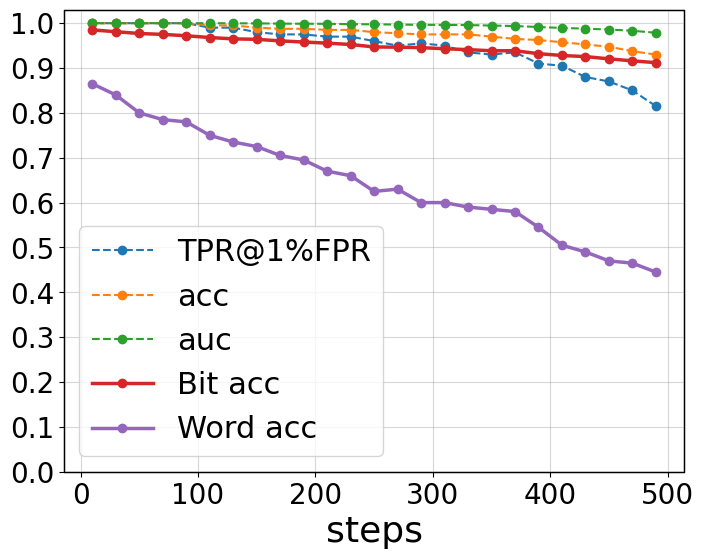

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))


for metric in detect_metrics:
    # plt.subplot2grid((4, 4), pos, rowspan=2, colspan=2)

    ax.plot(
        steps, df_msg[metric], '--o', label=metric, markersize=markersize
    )

ax.plot(
    steps, df_msg["Bit_acc"], '-o', label="Bit acc", markersize=markersize, linewidth=2.5
)

ax.plot(
    steps, df_msg["Word_acc"], '-o', label="Word acc", markersize=markersize, linewidth=2.5
)


plt.xticks(
    np.arange(0, 600, 100), fontsize=ticks_font
)
plt.yticks(
    np.linspace(0, 1, 11), fontsize=ticks_font
)

plt.ylim(0.0, 1.03)

ax.set_xlabel("steps", fontsize=label_font)
ax.legend(fontsize=legend_font)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(1)

ax.grid(alpha=0.5)
# --------

plt.savefig("detect_diff_metr.png", bbox_inches='tight')
None

In [31]:
df_detect = get_runs_df("new_big_diff_attacks")[['''TPR@1%FPR''', "acc", "auc"]].iloc[1::2, :]

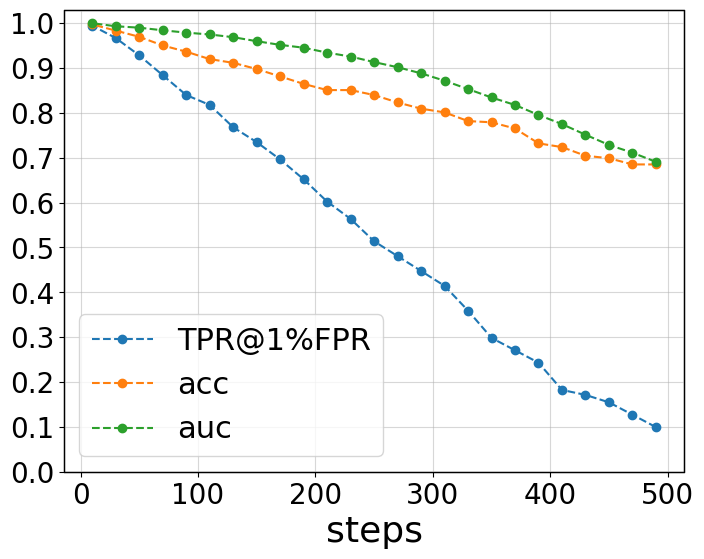

In [32]:
detect_metrics = ['''TPR@1%FPR''', "acc", "auc"]

fig, ax = plt.subplots(figsize=(8, 6))


for metric in detect_metrics:

    ax.plot(
        steps, df_detect[metric], '--o', label=metric, markersize=markersize
    )

# ax.plot(
#     steps, df_msg["Bit_acc"], '-o', label="Bit acc", markersize=markersize, linewidth=2.5
# )

# ax.plot(
#     steps, df_msg["Word_acc"], '-o', label="Word acc", markersize=markersize, linewidth=2.5
# )



plt.xticks(
    np.arange(0, 600, 100), fontsize=ticks_font
)
plt.yticks(
    np.linspace(0, 1, 11), fontsize=ticks_font
)

plt.ylim(0.0, 1.03)

ax.set_xlabel("steps", fontsize=label_font)
ax.legend(fontsize=legend_font)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(1)

ax.grid(alpha=0.5)
# --------

plt.savefig("detect_diff_treering_metr.png", bbox_inches='tight')
None

---
# VAE:


In [33]:
df_msg = get_runs_df("vae_attacks_metr")

df_msg = df_msg.loc[:, ["Word_acc", "Bit_acc", "vae_attack_quality", '''TPR@1%FPR''', "acc", "auc"]].sort_values(by="vae_attack_quality", ascending=False)

In [34]:
quality = df_msg["vae_attack_quality"]
TPR_1_FPR = df_msg["TPR@1%FPR"]
acc = df_msg["acc"]
auc = df_msg["auc"]

detect_metrics = ['''TPR@1%FPR''', "acc", "auc"]

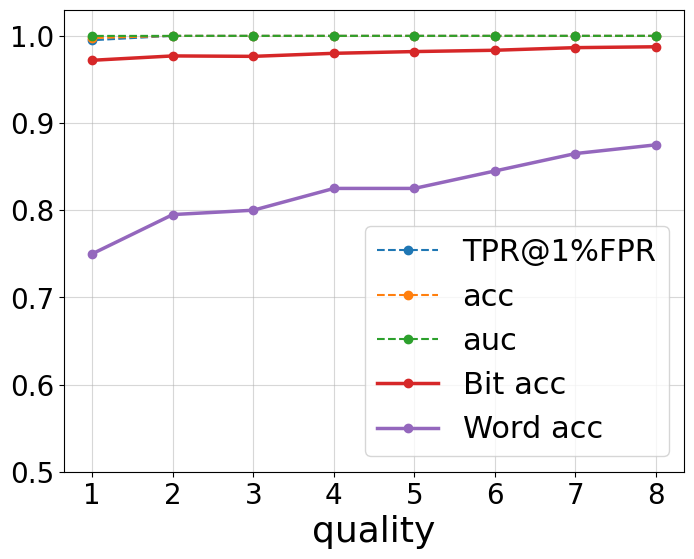

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

for metric in detect_metrics:

    ax.plot(
        quality, df_msg[metric], '--o', label=metric, markersize=markersize
    )

ax.plot(
    quality, df_msg["Bit_acc"], '-o', label="Bit acc", markersize=markersize, linewidth=2.5
)

ax.plot(
    quality, df_msg["Word_acc"], '-o', label="Word acc", markersize=markersize, linewidth=2.5
)


plt.xticks(
    np.linspace(1, 8, 8), fontsize=ticks_font
)
plt.yticks(
    np.linspace(0.5, 1., 6), fontsize=ticks_font
)

ax.grid(alpha=0.5)

plt.ylim(0.5, 1.03)
plt.xlabel("quality", fontsize=label_font)
plt.legend(fontsize=legend_font)
# --------

plt.savefig("detect_vae_metr.png", bbox_inches='tight')

In [36]:
df_detect = get_runs_df("vae_2018_attacks")[['''TPR@1%FPR''', "acc", "auc"]]

In [37]:
detect_metrics = ['''TPR@1%FPR''', "acc", "auc"]

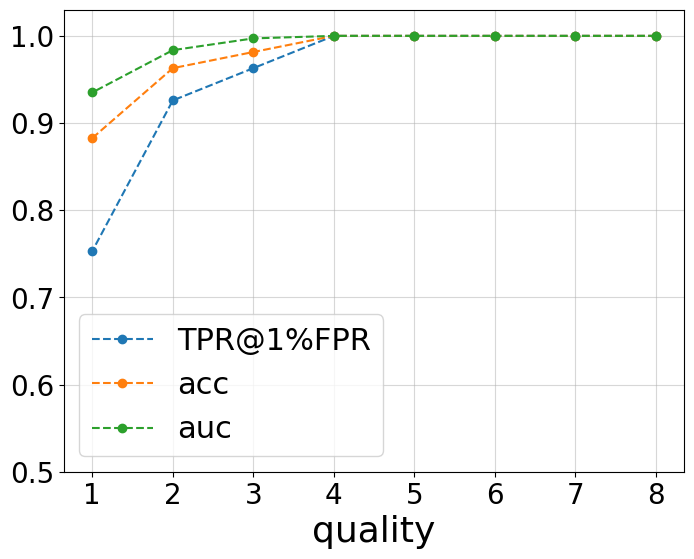

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

for metric in detect_metrics:

    ax.plot(
        quality, df_detect[metric], '--o', label=metric, markersize=markersize
    )

# ax.plot(
#     quality, df_msg["Bit_acc"], '-o', label="Bit acc", markersize=markersize, linewidth=2.5
# )

# ax.plot(
#     quality, df_msg["Word_acc"], '-o', label="Word acc", markersize=markersize, linewidth=2.5
# )


plt.xticks(
    np.linspace(1, 8, 8), fontsize=ticks_font
)
plt.yticks(
    np.linspace(0.5, 1., 6), fontsize=ticks_font
)

ax.grid(alpha=0.5)

plt.ylim(0.5, 1.03)
plt.xlabel("quality", fontsize=label_font)
plt.legend(fontsize=legend_font)
# --------

plt.savefig("detect_vae_treering.png", bbox_inches='tight')